# **Load package**

In [2]:
%pylab inline
!pip install ipython-autotime
%load_ext autotime  

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import keras
from keras.datasets import cifar10
from sklearn.metrics import mean_squared_error 

Populating the interactive namespace from numpy and matplotlib
  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1831 sha256=8d22220e84e7b2a945375b9bb120f9e3a25680699141c0680f8c0f1ddcc00c24
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


# **Load data and print example img**

170500096/170498071 [==============================] - 6s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


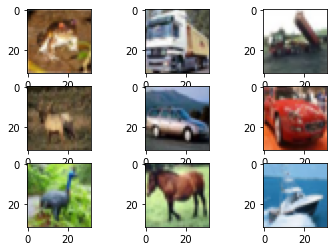

time: 9.51 s


In [3]:
(train_X,train_Y),(test_X,test_Y) = cifar10.load_data()
print('Train: X=%s, y=%s' % (train_X.shape, train_Y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_Y.shape))
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_X[i])
plt.show()

**One-hot vector converting**

In [4]:
train_Y  = keras.utils.to_categorical(train_Y)
test_Y  = keras.utils.to_categorical(test_Y)

time: 3.49 ms


# **Scale unint8 to float32 0.0 -> 1.0**
Data normalization->more suitable data for CNN

In [5]:
train_X = train_X.astype(np.float32)/255.0
test_X = test_X.astype(np.float32)/255.0

time: 319 ms


# **Create model**

In [15]:
model = Sequential()
# Stack of convol layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
# Output
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))
model.add(Dense(10, activation='sigmoid'))
# Compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

In [16]:
history_1 = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_split=0.1, verbose=0)

time: 1min 40s


> 63.940


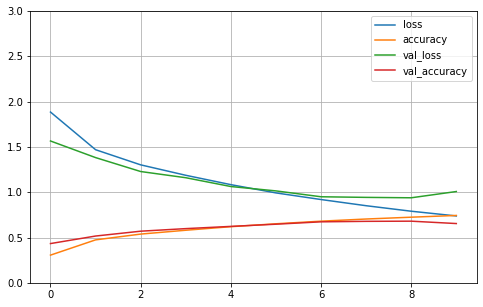

time: 1.79 s


In [17]:
import pandas as pd

_, acc = model.evaluate(test_X, test_Y, verbose=0)
print('> Accuracy with 3 conv layers, at 10 epochs:  %.3f' % (acc * 100.0))

pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()

# **Data Augmentation**

In [27]:
from keras.preprocessing.image import ImageDataGenerator
# create data generator
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(train_X, train_Y, batch_size=64)
history_2 = model.fit(it_train, steps_per_epoch=train_X.shape[0]//64, epochs=10, validation_data=(test_X, test_Y), verbose=0)

time: 5min 47s


> Accuracy with 3 conv layers, at 10 epochs and data augmentation:  74.020


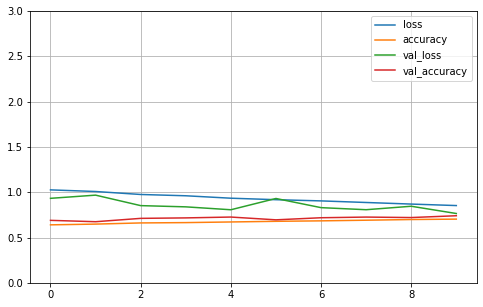

time: 1.75 s


In [29]:
_, acc = model.evaluate(test_X, test_Y, verbose=0)
print('> Accuracy with 3 conv layers, at 10 epochs and data augmentation:  %.3f' % (acc * 100.0))

pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()

> Accuracy with 3 conv layers, at 100 epochs and data augmentation:  82.290


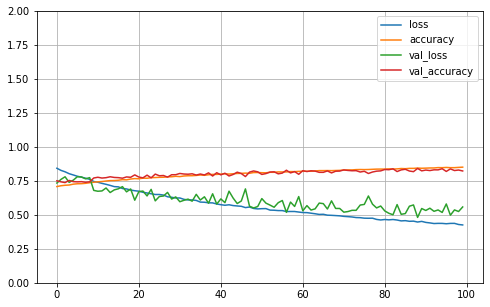

time: 57min 45s


In [31]:
history_3 = model.fit(it_train, steps_per_epoch=train_X.shape[0]//64, epochs=100, validation_data=(test_X, test_Y), verbose=0)
_, acc = model.evaluate(test_X, test_Y, verbose=0)
print('> Accuracy with 3 conv layers, at 100 epochs and data augmentation:  %.3f' % (acc * 100.0))

pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()